# introducion to Regression

Written by:
- Manuel Szewc (School of Physics, University of Cincinnati)
- Philip Ilten (School of Physics, University of Cincinnati)
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

## Introduction

This notebook wants to implement simple Machine Learning algorithms to deal with regression problems. Let's first import some basic libraries.

In [14]:
import os

# To generate data and handle arrays
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Theory

Regression seeks to model a dependent variable $t$ as a function of an independent variable $x$ (with arbitrary dimensionalities). The basic assumption is that $t$ is randomly sampled from a deterministic function $y(x)$ such that:

$$t\sim \mathcal{N}(y(x,w),\sigma^{2})$$

where the uncertainty $\sigma$ could be measurement specific (what is called an heterocedastic problem). In this notebook we assume a shared uncertainty (what is usually called the homocedasticity assumption).

Let's now deal with the simplest case. Assume both $t$ and $x$ are one-dimensional and we assume a linear relationship:

$$y(x,w)=w_{0}+w_{1}x$$

This is of course an assumption which is never likely exact. Part of the problem is defining a good enough parameterization (and characterizing what good enough means!).

In [15]:
N_SAMPLES = 20
x = np.linspace(0,1,num=N_SAMPLES).reshape(-1,1)
t =  4 * x+ np.sin(x*6)+ 0.5*np.random.randn(N_SAMPLES,1)

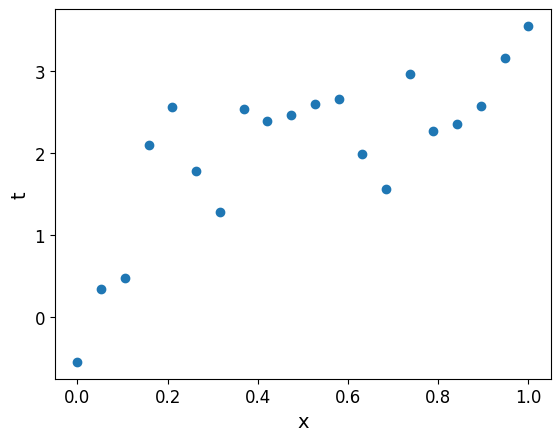

In [16]:
plt.scatter(x,t)
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [17]:
def y_true(x):
  return  4 * x+ np.sin(x*6)

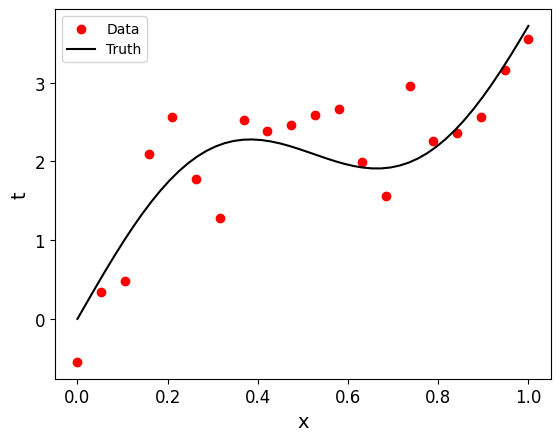

In [18]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

For any model $y(x,w)$, we need to estimate convenient values for the parameters $w$. A very common choice is to obtain the parameters $w_{\mathrm{MLE}}$ that maximize the joint probability of all measurements (which is also called the likelihood of the parameters). These are called the **maximum likelihood estimates (MLE)**. 

For numerical convenience, it is almost always more useful to maximize the log-likelihood (or minimize the negative log-likelihood). For $N$ independent measurements with gaussian errors, we have that

$$\ln \mathcal{L}(w) = \sum_{n=1}^{N} \ln p(t_{n}|x_{n},w)$$

$$\ln \mathcal{L}(w) = \sum_{n=1}^{N} -\frac{(t_{n}-y(x_{n},w))}{2\sigma^{2}} + \text{terms independent of $w$}$$

and we recover the usual $\chi^{2}$ statistic for goodness of fit. Following the standard conventions, we can frame our Maximum Likelihood problem as a minimization of an error metric, which in this case is simply

$$\ln \mathcal{L}(w) \propto - \sum_{n=1}^{N}(t_{n}-y(x_{n},w))^{2} = - \text{MSE}(t,y) $$

where MSE stands for mean squared error. 

Our simplified model $y(x,w) = w_{0}+w_{1}x$ is a particular case of a linear model, where linear is with respect with the parameters $w$, not the features $x$. We can write a general linear model as

$$y(x,w)=\sum_{k=0}^{K}w_{k}\phi_{k}(x)=\vec{w}^{T}\cdot\vec{\phi}(x)$$

where $K+1$ is the number of basis functions. We can obtain the maximum likelihood (ML) estimates of the coefficients by solving the **normal equations**

$$\vec{w}_{\mathrm{MLE}}=(\Phi^{T}\Phi)^{-1}\Phi^{T}\vec{t}$$

where $\vec{w}_{\mathrm{MLE}}=(w_{0,MLE},w_{1,MLE},\dots,w_{K,MLE})^{T}$, $\vec{t}$ is a column-vector of all $N$ measured target values, and $\Phi$ is the design matrix. The design matrix contains all measured values of the basis functions used to parameterize the problem. In our simple case, these basis functions are simply $1$ and $x$ and we have:

$$y(x_{i},\vec{w})=w_{0}\phi_{0}(x_{i})+w_{1}\phi_{1}(x_{i})$$

$$\phi_{0}(x)=1$$

$$\phi_{1}(x)=x$$

which can be rewritten as 

$$y(x_{i},\vec{w})=\vec{w}^{T}\cdot\vec{\phi}(x_{i})$$

where

$$\vec{w}^{T}=(w_{0},w_{1})$$

$$\vec{\phi}^{T}(x_{i})=(\phi_{0}(x_{i}),\phi_{1}(x_{i}))$$

Grouping all measurements we have that 

$$\vec{y}^{T}=(y_{1},y_{2},...,y_{N})$$

$$\vec{y}=\Phi\cdot\vec{w}$$

As a sanity check, one always needs to ensure that for $M$ basis functions and $N$ measurements

$\vec{w}_{\mathrm{MLE}} \in \mathbb{R}^{M \text{ x } 1} $

$\Phi\in \mathbb{R}^{N \text{ x } M} $

$\vec{t}\in \mathbb{R}^{N \text{ x } 1} $ 

In [19]:
Phi=np.vstack([np.ones(len(x)),x[:,0]]).T # agrupo 1s y xs para cada medicion
print(Phi.shape)

(20, 2)


To solve the normal equations, we need to compute the inverse of the design matrix. A more numerically stable approach is to solve the following equivalent equation

$$(\Phi^{T}\Phi)\vec{w}_{\mathrm{MLE}}=\Phi^{T}\vec{t}$$

where we can use for example  `np.linalg.solve(A,b)` to obtain the vector $\vec{x}$ that is a solution of

$$A\vec{x}=b$$



In [20]:
A=np.dot(Phi.T,Phi)
b=np.dot(Phi.T,t)
wML=np.linalg.solve(A,b)

We can inspect the solution

In [21]:
wML

array([[0.85231206],
       [2.39930952]])

and plot the resulting function

In [22]:
def y_ML(x,wML):
  return wML[0]+wML[1]*x

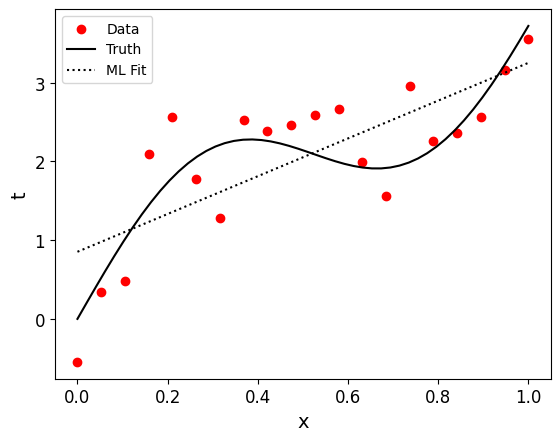

In [23]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth')
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='ML Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Of course, the eye test already tells us that the linear model is not performing greatly. However, we need to quantify this. We can define the Root Mean Squared Error of a model as 

$$\text{RMSE}(t,y)=\sqrt{\frac{1}{N}(t_{n}-y_{n})^{2}}$$

which captures the average error of our model. This is only one among many possible metrics, which depend on what exactly we want to quantify. This one in particular is motivated by the Maximum Likelihood problem we are trying to solve.

In [24]:
def rmse(t,y):
    return np.sqrt(np.mean((t-y)**2))

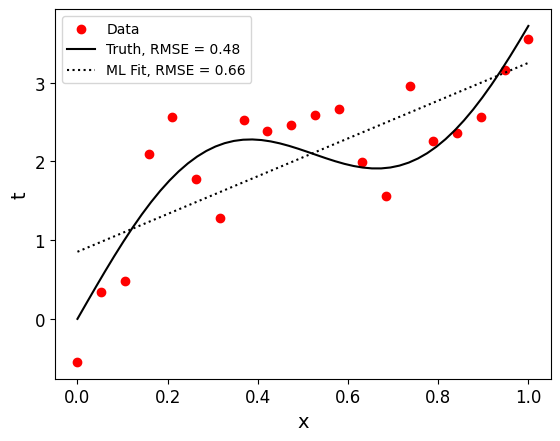

In [25]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth, RMSE = '+str(np.round(rmse(t,y_true(x)),2)))
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='ML Fit, RMSE = '+str(np.round(rmse(t,y_ML(x,wML)),2)))
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

We can also plot the residuals to study the deviation from the expected value. For a good model, we expect residuals to be normally distributed around zero with hopefully a small variance.

Text(0.5, 1.0, 'Residuals')

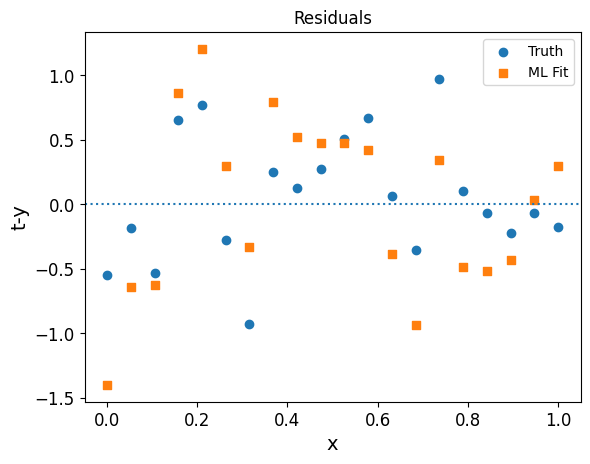

In [26]:
plt.scatter(x,t-y_true(x),marker='o',label='Truth')
plt.scatter(x,t-y_ML(x,wML),marker='s',label='ML Fit')
plt.axhline(0.0,linestyle='dotted')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('t-y')
plt.title('Residuals')

### Ejercicio

Repeat the exercise with a more general linear model:

$$y(x_{i},w)=w_{0}+\sum_{d=1}^{5}w_{d}x^{d}_{i}$$

In [ ]:

###SOLUTION_START

In [27]:
Phi=np.vstack([np.ones(len(x)),x[:,0],x[:,0]**2,x[:,0]**3,x[:,0]**4,x[:,0]**5]).T#[1.0 x x2 x3 x4 x5]

In [28]:
Phi.shape

(20, 6)

In [29]:
print(x[0],Phi[0])

[0.] [1. 0. 0. 0. 0. 0.]


In [30]:
Phi=np.asarray([x[:,0]**m for m in range(6)]).T

In [31]:
Phi.shape

(20, 6)

In [32]:
A=np.dot(Phi.T,Phi)
b=np.dot(Phi.T,t)
wML=np.linalg.solve(A,b)

In [33]:
wML

array([[  -0.62772028],
       [  22.44251487],
       [ -71.51234961],
       [ 123.03251081],
       [-114.31968424],
       [  44.59808052]])

In [34]:
def y_ML(x,wML):
  return wML[0]*(x**0)+wML[1]*x+wML[2]*(x**2)+wML[3]*(x**3)+wML[4]*(x**4)+wML[5]*(x**5) 

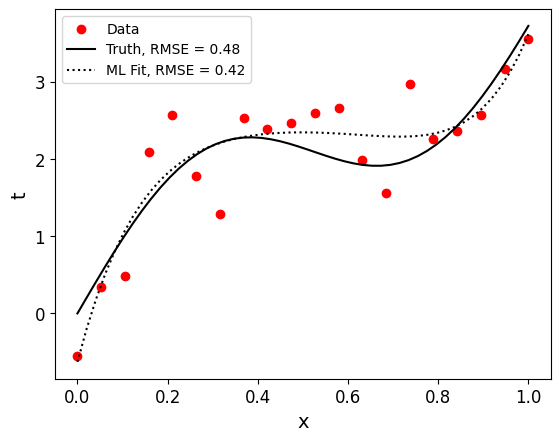

In [35]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth, RMSE = '+str(np.round(rmse(t,y_true(x)),2)))
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='ML Fit, RMSE = '+str(np.round(rmse(t,y_ML(x,wML)),2)))
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [36]:
###SOLUTION_STOP

### Model evaluation, under and overfitting

We have trained two models and evaluated the performance. However, this evaluation is fundamentally flawed. Why? Because we have evaluated on the same data used to train the model. This is particularly dangerous when we risk overfitting the problem.

To illustrate this, let's create a new dataset

In [37]:
N_SAMPLES = 10
x = np.random.rand(N_SAMPLES, 1)
t = np.sin(2*np.pi*x) + np.random.randn(N_SAMPLES, 1) * 0.3

In [38]:
def y_true(x):
    return np.sin(2*np.pi*x)

As a rule of thumb, one should always evaluate on data **unseen during training**. We can call this the test data. For us, it's free to generate more data but otherwise we need to split the data before training.

In [39]:
N_SAMPLES_TEST = 10
x_test = np.random.rand(N_SAMPLES_TEST, 1)
t_test = np.sin(2*np.pi*x_test)+ 0.3*np.random.randn(N_SAMPLES_TEST,1)

Under and overfitting is a function of the model. For our simplified polynomial linear models, we can explore model space by changing the polynomial degree. To do this, let's define a simple class that trains and evaluates a model for a given degree

In [40]:
class LinearModelDegree():
    def __init__(self,degree):
        self.degree = degree
        self.wML = np.zeros(degree+1)

    def fit(self,x,t):
        Phi = np.array([x[:,0]**i for i in range(self.degree+1)]).T
        A=np.dot(Phi.T,Phi)
        b=np.dot(Phi.T,t)
        self.wML=np.linalg.solve(A,b)
        return self

    def y_ML(self,x):
        Phi = np.array([x[:,0]**i for i in range(self.degree+1)]).T
        return np.dot(Phi,self.wML)

    def Phi(self,x):
        Phi = np.array([x[:,0]**i for i in range(self.degree+1)]).T
        return Phi
    

Let's see how this looks for a few possible choices

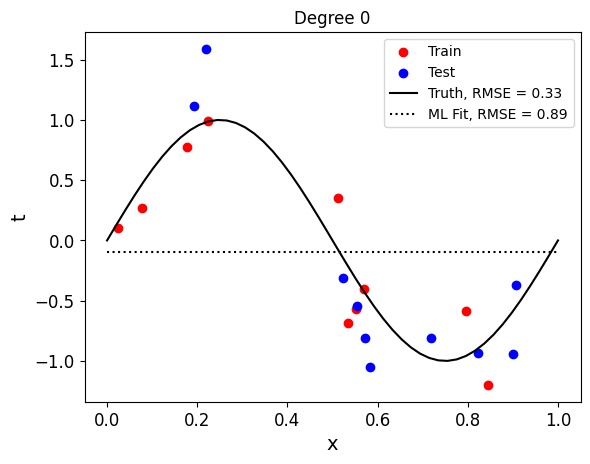

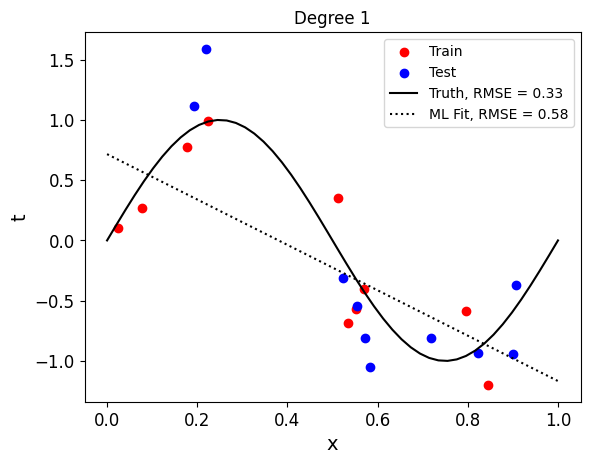

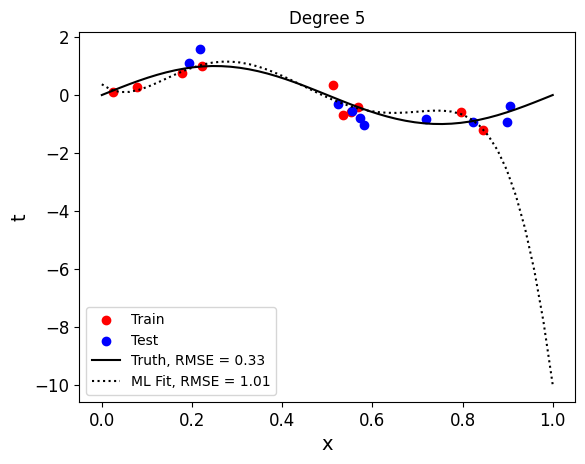

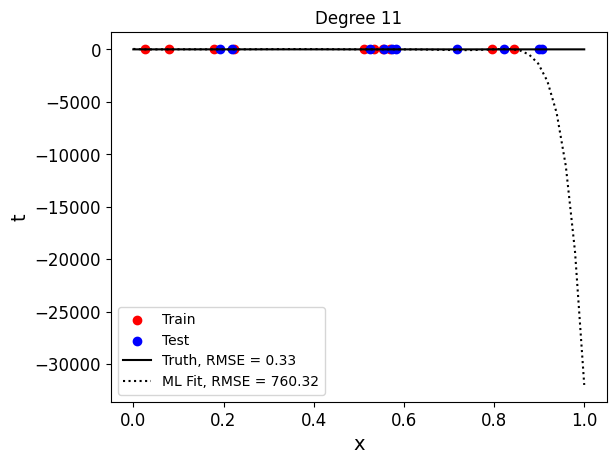

In [41]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
for degree in [0,1,5,11]:#range(6):
    plt.scatter(x,t, c='red', label='Train')
    plt.scatter(x_test,t_test, c='blue', label='Test')
    model = LinearModelDegree(degree)
    model.fit(x,t)
    plt.plot(xvals,y_true(xvals),color='black',label='Truth, RMSE = '+str(np.round(rmse(t_test,y_true(x_test)),2)))
    plt.plot(xvals,model.y_ML(xvals),color='black',linestyle='dotted',label='ML Fit, RMSE = '+str(np.round(rmse(t_test,model.y_ML(x_test)),2)))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title('Degree %i' % degree)
    plt.show()

It's very clear that low degrees do not adjust the data particularly well (underfitting) while high degrees adjust the training data too well and generalize poorly (overfitting).

To quantify this, we again compute the RMSE metric over unseen data for each model. We can plot this and select the best polynomial degree.

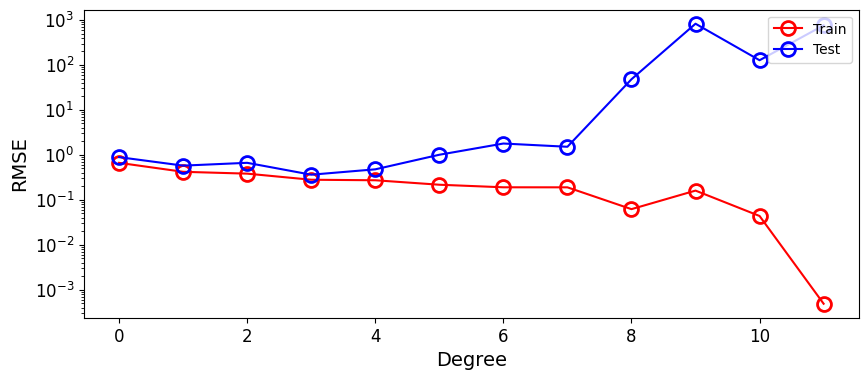

In [42]:
max_degree = 11
rmse_vals = np.zeros(max_degree+1)
rmse_vals_test = np.zeros(max_degree+1)
for ndegree, degree in enumerate(range(max_degree+1)):
    model = LinearModelDegree(degree)
    model.fit(x,t)
    rmse_vals[ndegree] = rmse(t,model.y_ML(x))
    rmse_vals_test[ndegree] = rmse(t_test,model.y_ML(x_test))

plt.figure(figsize=(10,4))
plt.plot(range(max_degree+1), rmse_vals, 'o-r', mfc='None', ms=10, mew=2, label='Train')
plt.plot(range(max_degree+1), rmse_vals_test, 'o-b', mfc='None', ms=10, mew=2,label='Test')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.yscale('log')
plt.legend(loc='upper right')

We see how the two losses start to diverge for a degree of 3/4. The particularly values of the metrics are not (too) important, the important thing is that their behaviours diverge as I increase the degree.

### Validation and cross-validation

In the previous section we simply evaluated on unseen data. However, if we use the data to select a model, we are effectively training on it and risk overfitting it as well. To avoid this, test data is usually left to the very end to evaluate model performance after all model selections and training have taken place (of course, this may never happen exactly in practice but one should aspire to it).

To perform model selection, one usually splits the training dataset into two, where one subset is used to train models and the other, called validation set, is used to evaluate models and perform model selection.

In [43]:
x_train, x_val = x[:8], x[8:]
t_train, t_val = t[:8], t[8:]

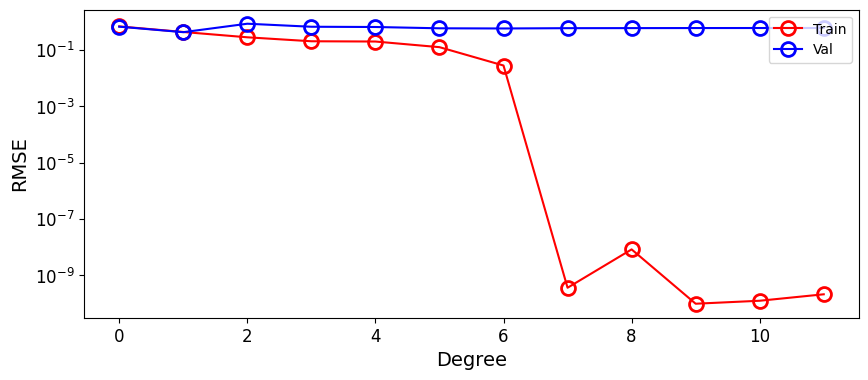

In [44]:
max_degree = 11
rmse_vals = np.zeros(max_degree+1)
rmse_vals_val = np.zeros(max_degree+1)
for ndegree, degree in enumerate(range(max_degree+1)):
    model = LinearModelDegree(degree)
    model.fit(x_train,t_train)
    rmse_vals[ndegree] = rmse(t_train,model.y_ML(x_train))
    rmse_vals_val[ndegree] = rmse(t_val,model.y_ML(x_val))

plt.figure(figsize=(10,4))
plt.plot(range(max_degree+1), rmse_vals, 'o-r', mfc='None', ms=10, mew=2, label='Train')
plt.plot(range(max_degree+1), rmse_vals_val, 'o-b', mfc='None', ms=10, mew=2,label='Val')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.yscale('log')
plt.legend(loc='upper right')

What happened here? Well, we're evaluating on two samples. Thus, splitting the data like this risks having too few datapoints to trust our metrics.

To avoid this, we introduce the concept of **cross-validation**. 

In cross-validation, we split the data into $K$ subsets. We train the model $K$ times, where for each training we select one subset as the validation set and train our model over the remaining $K-1$ datasets. Then, we can average our $K$ metrics to obtain the average validation metric.

The particular case where $K=N$ corresponds to leave-one-out-cross-validation (LOO-CV). Usually, increasing $K$ increases training costs so LOO-CV is not so common. Also, it may induce some unwanted variance as well.

For our model with so few datapoints, cost is not an issue so let's due LOO-CV.

In [45]:
np.vstack([x[:1],x[2:]]).shape

(9, 1)

In [46]:
rmse_vals_val_kfold = np.zeros((N_SAMPLES,max_degree+1))
for nsample in range(N_SAMPLES):
    for ndegree, degree in enumerate(range(max_degree+1)):
        x_train, t_train = np.vstack([x[:nsample],x[nsample+1:]]), np.vstack([t[:nsample],t[nsample+1:]])
        # print(x_train.shape,t_train.shape)
        x_val, t_val = x[nsample].reshape(-1,1), t[nsample].reshape(-1,1)
        model = LinearModelDegree(degree)
        model.fit(x_train,t_train)
        rmse_vals_val_kfold[nsample,ndegree] = rmse(t_val,model.y_ML(x_val))


In [47]:
np.mean(rmse_vals_val_kfold,0)

array([  0.65952165,   0.47617009,   0.48223378,   0.39752897,
         0.66732281,   0.73789598,   1.20662184,  26.84531716,
       279.71873084, 302.45743305, 352.70974646, 263.60761493])

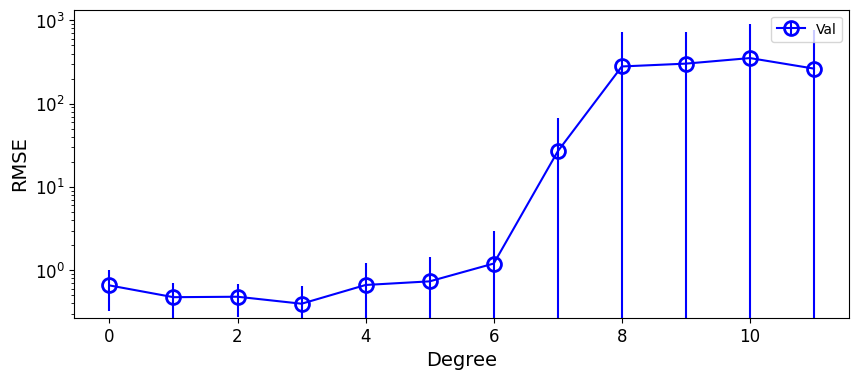

In [48]:
plt.figure(figsize=(10,4))
plt.errorbar(x=range(max_degree+1), y=np.mean(rmse_vals_val_kfold,0),yerr=np.std(rmse_vals_val_kfold,0), fmt='o-b', mfc='None', ms=10, mew=2,label='Val')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.yscale('log')
plt.legend(loc='upper right')

Now we can choose the best model as the one that minimizes the average RMSE.

In [50]:
best_degree = np.argmin(np.mean(rmse_vals_val_kfold,0))
best_model = LinearModelDegree(int(best_degree))
best_model.fit(x,t)
print(best_degree,best_model.wML)

3 [[ -0.23459892]
 [ 10.80688224]
 [-31.51477514]
 [ 21.02952709]]


### `sklearn` 

In practice, one might prefer to standard libraries to use general 

A very popular choice is `scikit-learn` which contains a lot of useful regressors. The particular case we used here is accessible through `sklearn.LinearRegression`. To build a particular polynomial model, we can use the `sklearn.preprocessing.Pipeline` class (in particular, `PolynomialFeatures`).

Cross-validation errors can be computed easily for a fixed model using `sklearn.model_evaluation.cross_val_score`.

To explore model space, `scikit-learn` offers two methods called `GridSearchCV`, `RandomizedSearchCV`. The first explores parameters over a grid, the second using random sampling.


#### Exercise:

Re-do all the examples using `scikit-learn`.

In [51]:
###SOLUTION_START

###SOLUTION_STOP

### Bayesian Linear Regression

In the previous sections, we followed the standard protocol:

- For each measurement $n=1,...,N$, we collect a dependent target $t_{n}$ and $D$ independet features grouped as $x_{n}$. 
- We model our problem using a linear model $y=\sum_{i=0}^{M}w_{j}\phi_{j}(\vec{x})=\vec{w}^{T}\vec{\phi}$, and assume a likelihood $$p(t|\vec{x},\vec{w},\beta)=\mathcal{N}(y(\vec{w},\vec{x}),\beta^{-1})$$ (where $\beta$ has been used instead of $\sigma$ for future convenience).
- We obtain the MLE estimator $\vec{w}_{\mathrm{MLE}}$ by solving the normal equations

$$
\vec{w}_\mathrm{MLE} = (\Phi^{T}\cdot\Phi)^{-1}\cdot\Phi^{T}\cdot t
$$
and we can obtain the MLE estimator for the precision $\beta$
$$
\frac{1}{\beta_{\mathrm{MLE}}} = \frac{1}{N}\sum_{n=1}^N\left\{y(x_n, \vec{w}_{\mathrm{MLE}}) - t_n\right\}^2\;\;,
$$

This approach, although successful, can be extended to estimate uncertainties on the estimators. This can be done in a frequentist way or in a Bayesian way. In this notebook we explore the latter.


#### Bayesian model

In Bayesian inference, we aim to obtain a posterior distribution over the parameters $\vec{w}$ given the measurements $\vec{x},\vec{t}$ and a particular likelihood function. To do so, we use Bayes theorem which states that the posterior distribution is

$$p(\vec{w},\beta|\vec{x},\vec{t})=\frac{p(t|\vec{x},\vec{w},\beta)p(\vec{w})p(\beta)}{p(t|\vec{x})}$$

where $p(\vec{w})$ and $p(\beta)$ are the prior distributions over $\vec{w}$ and $\beta$ and $p(t|\vec{x})$ is the marginal likelihood or evidence of the model which integrates over all possible parameter values

$$p(t|\vec{x})=\int d\vec{w}d\beta\,p(t|\vec{x},\vec{w},\beta)p(\vec{w})p(\beta)$$

In this notebook, we'll explore Bayesian techniques of increasing complexity

- Estimate the Maximum A Posterior (MAP) values of the parameters. This is equivalent to solving a MLE problem with regularization, where the regularization arises from the prior.
- Obtain the full posterior which encodes the uncertainties over the obtained parameters.

We then show how to use either the MAP or the full posterior to predict new values $t'$ for a given new independent measurement $x'$.

Before solving the problem, we need to specifiy the prior.

Prior specification is perhaps more an art than a science. There are particular choices which are preferred, either because they render posterior estimation easier (which is the case for conjugate priors of exponential likelihoods, as we'll detail here) or because they are preferred from some information theoretic perspective (Jeffreys's prior). In general, one should wish for small to no dependence on the prior. However, priors do encode previous knowledge and regularization of the problem and thus shouldn't be simply dismissed as an inconvenience of Bayesian methods.


In the following, we'll assume $\beta$ is known and fixed, and focus on $\vec{w}$.


**Prior for $\vec{w}$**

Asumamos $\beta$ conocido y consideremos ahora a los $\vec{w}$ como variables aleatorias. Como tal, podemos considerar un prior previo a las mediciones

$$p(\vec{w}|\gamma)$$

donde $\gamma$ son los parametros del prior. Es uno de los **hiperparametros** del modelo.

Dado que la verosimilitud es una normal, podemos utilizar la prior conjugada: [otra normal](https://knowyourmeme.com/photos/1578199-emperor-palpatine-ironic).

$$p(\vec{w}|\gamma)=\mathcal{N}(\vec{w}|0,\gamma^{-1}\mathbf{I}_{(M+1)\mathrm{x}(M+1)})$$

Donde $\gamma$ es un unico numero que controla la precision de los parametros. 
Dado que tenemos $M+1$ parametros (ya que incluimos el sesgo $w_{0}$):

$$p(\vec{w}|\gamma)=\left(\frac{\gamma}{2\pi}\right)^{(M+1)/2} \exp{\left\{-\frac{\gamma}{2}\vec{w}^T\vec{w}\right\}}$$

**Maximum a Posterior (MAP)**

Para encontrar la distribución posterior de los parámetros, usamos el teorema de Bayes.

$$
p(\vec{w} | t, \beta, \gamma) = \frac{p(t | \vec{w}, \beta, \gamma)\,p(\vec{w} | \gamma)}{p(t | \beta, \gamma)}\;\;,
$$ 

donde escribí de forma explícita todos los elementos condicionales salvo $x$ y los hiperparámetros $\beta$ y $\gamma$). 

Antes de ir a la posterior, podemos sacar el MAP. Como su nombre lo indica, es encontrar el vector $\vec{w}_{MAP}$ que maximiza la posterior. Dado que incorpora la informacion del prior, es menos propenso al sobreajuste que el $\vec{w}_{\mathrm{MLE}}$. Dado que el numerador es una constante con respecto a $\vec{w}$, podemos obviarlo para buscar la maximización de la posterior.

Entonces, tenemos

$$p(\vec{w} | t, \beta, \gamma) \propto p(t | \vec{w}, \beta, \gamma)\,p(\vec{w} | \gamma)$$ 

Podemos hacer esto numericamente o aprovechar que utilizamos un prior conjugado que nos permite encontrar soluciones analiticas. Nuevamente, conviene considerar el logaritmo de la posterior

$$\text{Ln }p(\vec{w}|t,\beta,\gamma) = \text{Ln }p(t|\vec{w},\beta,\gamma) + \text{Ln }p(\vec{w}|\gamma) +\text{ cte} $$

$$\text{Ln }p(\vec{w}|t,\beta,\gamma) = -\frac{\beta}{2}\sum_{n=1}^N \left\{t_n - \vec{w}^{T}\vec{\phi}(x_n)\right\}^2 - \frac{\gamma}{2}\vec{w}^{T}\vec{w} +\text{ cte} $$

El ojo avispado puede darse cuenta de que esta funcion a maximizar es la que consideramos cuando vimos regresion RIDGE identificando $\frac{\gamma}{\beta}=\lambda$

Maximizando este posterior, tenemos que

$$
\vec{w}_\mathrm{MAP} = \left(\frac{\gamma}{\beta}\mathrm{\mathbf{I}} + \Phi^{T} \cdot\Phi\right)^{-1}\cdot \Phi^{T}\cdot t
$$

y en efecto $\frac{\gamma}{\beta}$ controla el peso relativo entre prior y verosimilitud. Si vamos al limite $\gamma \rightarrow 0$ vemos que $\vec{w}_{MAP}\rightarrow\vec{w}_{\mathrm{MLE}}$. Esto se explica muy facilmente: en ese limite el prior se vuelve uniforme y no agrega informacion a los datos, por lo que MAP y ML son equivalentes.

Con otras elecciones de prior, podemos llegar a Lasso u otro tipo de regularizaciones (ver ec. 3.56 del [Bishop](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)).

In [196]:
beta = 1/0.3
gamma = 1e-2 / 0.3 # gamma/beta = lambda 
M = 8

model = LinearModelDegree(M)

Phi_train=model.Phi(x_train)
Phi_test=model.Phi(x_test)

Ejercicio:

Resolvamos las ecuaciones normales:

In [52]:
###SOLUTION_START

###SOLUTION_STOP

#### Posterior distribution

Ahora si obtengamos el posterior. La ventaja de utilizar priors conjugados es que sabemos la forma de la posterior

$$p(\vec{w}|t,\gamma,\beta)=\mathcal{N}(\vec{w}|\vec{\mu}_{N},\mathbf{S}_{N})$$

Con un poco de analisis podemos ver que para nuestro prior obtenemos que:

$$
\boxed{\begin{array}{lll}
\vec{\mu}_N &=& \beta\;\mathbf{S}_N \cdot \Phi^{T}\cdot t\\
\mathbf{S}^{-1}_N &=& \gamma\;\mathbf{I} + \beta\;\Phi^{T}\cdot\Phi\;\;.
\end{array}}
$$

Noten que si metemos el resultado de $\mathbf{S}_N$ en al ecuación de la media, recuperamos la ecuación de arriba para $\vec{w}_\mathrm{MAP}$. Esto sucede porque, como la normal es simétrica, el valor que maximiza la posterior es también el valor medio de la distribucion.

Si tomamos un prior más general (pero siempre normal):

$$
p(\vec{w} | \vec{\mu}_0, \mathbf{S}_0) = \mathcal{N}(\vec{w} | \vec{\mu}_0, \mathbf{S}_0)\;\;,
$$

donde ahora la matiz de covarianza es general. Entre otras cosas, esto permite acomodar constantes de regularización diferentes para cada parámetro. Además, podemos pensar en una matriz no diagonal, mucho más flexible. 

En este caso el valor medio y matriz de precisión de la posterior es:

$$
\boxed{\begin{array}{lll}
\vec{\mu}_N &=& \mathbf{S}_N\cdot \left(\mathbf{S}^{-1}_0 \cdot \vec{\mu}_0 + \beta\;\Phi^{T}\cdot t\right)\\
\mathbf{S}^{-1}_N &=& \mathbf{S}^{-1}_0 + \beta\;\Phi^{T}\cdot\Phi\;\;.
\end{array}}
$$

Con esto, tenemos una descripción completa de la distribución del vector de parámetros $\vec{w}^{T} = (w_0, \ldots, w_M)$. 

#### Ejercicio: Fitteando una recta ruidosa de manera Bayesiana.

Tratemos de fittear los parametros $a_{0}$, $a_{1}$ de una recta $f(x,\vec{a}) = a_0 + a_{1}x$ donde $x$ está en el intervalo $[-1,1)$.

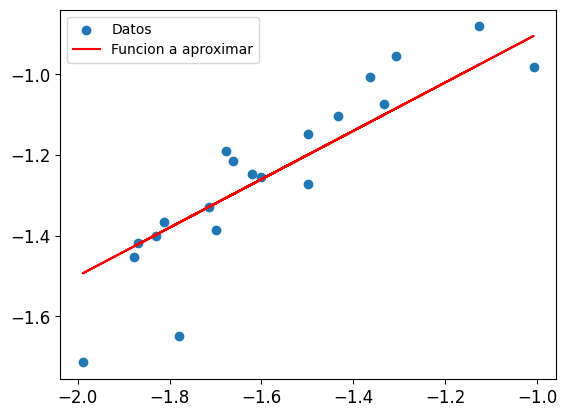

In [197]:
np.random.seed(60)
a0, a1 = -0.3, 0.6
var = 0.1
N = 20
x = -2.0 + np.random.rand(N)
f = a0+a1*x
t = a0+a1*x+var*np.random.randn(N)
plt.scatter(x,t,label='Datos')
plt.plot(x,f,color='red',label='Funcion a aproximar')
plt.legend(loc='upper left')

Como modelo usaremos una regresión lineal de la forma $y(x) = \omega_0 + \omega_1 x$. Escribamos para estos la matriz de diseño.
$$\Phi = \begin{pmatrix}
\phi_0(x_1) & \phi_1(x_1)\\
\phi_0(x_2) & \phi_1(x_2)\\
\vdots & \vdots\\
\phi_0(x_N) & \phi_1(x_N)\\
\end{pmatrix}$$

In [199]:
model = LinearModelDegree(1)
Phi=model.Phi(x.reshape(-1,1))
print(Phi.shape)
print(Phi[0])

(20, 2)
[ 1.         -1.69912667]


Obtengamos el *estimador de máxima verosimilitud* dado por 
$$\begin{pmatrix}
\omega_0^\text{ML}\\
\omega_1^\text{ML}\\
\end{pmatrix} 
= \left(\Phi^T \Phi\right)^{-1}\Phi^T \,\vec{t}
$$
donde recordemos que $\vec{t} = \begin{pmatrix}t_1\\ \vdots \\ t_N\end{pmatrix}$ es el vector de los valores *target* medidos.

In [202]:
model.fit(x.reshape(-1,1),t.reshape(-1,1))
wML = model.wML[:,0]
print(wML.shape)

(2,)


In [203]:
wML

array([-0.0453789 ,  0.76126673])

Si ahora utilizamos un prior gaussiano de la forma $p(\vec{\omega}) = \mathcal{N} (\vec{0},\gamma^{-1}{\bf 1})$ (es decir que $p(\vec{\omega}) = p(\omega_0) \times p(\omega_1)$ con cada $p(\omega_i) = \mathcal{N} (\mu=0,\sigma = \gamma)$ ) podemos actualizar iterativamente nuestra distribucion. ¿Qué quiere decir esto?

Para $n=1,...,N$:

$$p_{n}(\vec{w})=\frac{p(t_{n}|x_{n},\vec{w},\gamma, \beta)p_{n-1}(\vec{w}|\gamma,\beta,t_{1,...,n-1},x_{1,...,n-1})}{p(t_{n}|x_{n},\vec{w},\gamma, \beta,t_{1,...,n-1},x_{1,...,n-1})}$$

Con $p_{0}(\vec{w})=\mathcal{N} (\vec{0},\gamma^{-1}{\bf 1})$. Es decir, el posterior para el dato $n-1$ se transforma en el prior para el dato $n$.

Calculemos la verosimilitud y el posterior al usar solo 1 punto, 2 puntos, 3 puntos y todo el conjunto de 100 puntos. Para cada uno de estos casos grafiquemos:

*   El prior en esa iteracion en el espacio ($w_0$,$w_1$)
*   La recta en el espacio (x,t) definida por los ($w_0$,$w_1$) que maximizan el prior junto con la verdadera recta definida por ($a_0$,$a_1$).
*   La verosimilitud en esa iteracion en el espacio ($w_0$,$w_1$)
*   El posterior en esa iteracion en el espacio ($w_0$,$w_1$)


Utilicemos un metodo numerico y comparemos con la formula analitica del posterior.
$$
\vec{\mu}_N = \beta {\bf S}_N \Phi^T \vec{t}\\
{\bf S}_N^{-1} = \gamma {\bf 1} + \beta \Phi^T \Phi
$$
donde $\beta$ es el parámetro de precisión del ruido gaussiano, que en nuestro caso es $\beta = (1/\sigma)^2 = (1/0.2)^2 = 25$. Para seleccionar la cantidad de puntos a considerar, podemos usar slicing en $\vec{t}$ ( ``t[:N_puntos]``) y en $\Phi$ (``Phi[:N_puntos,:]``).

(100, 50)


/tmp/ipykernel_5743/3734267414.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


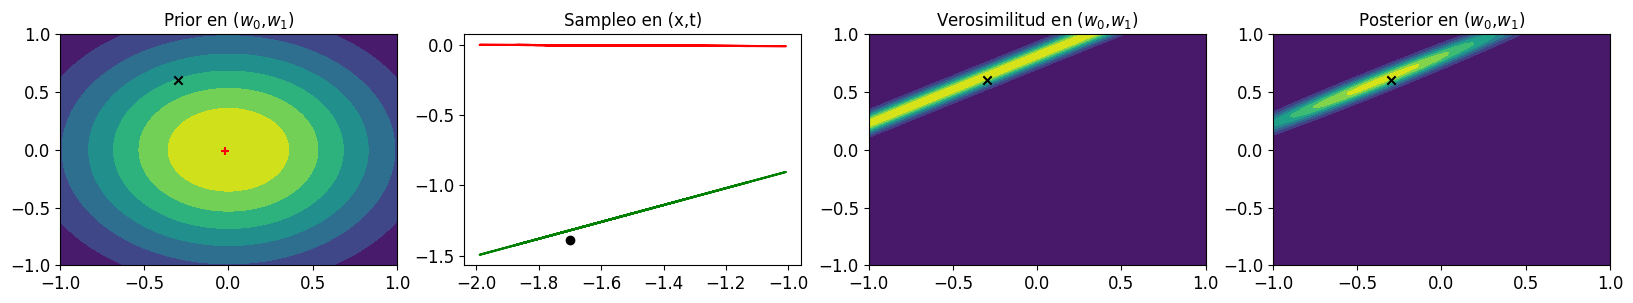

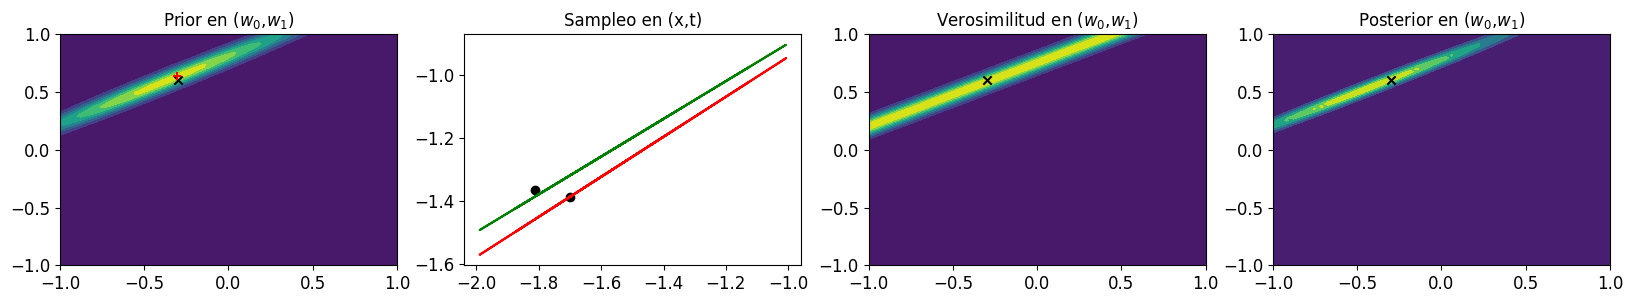

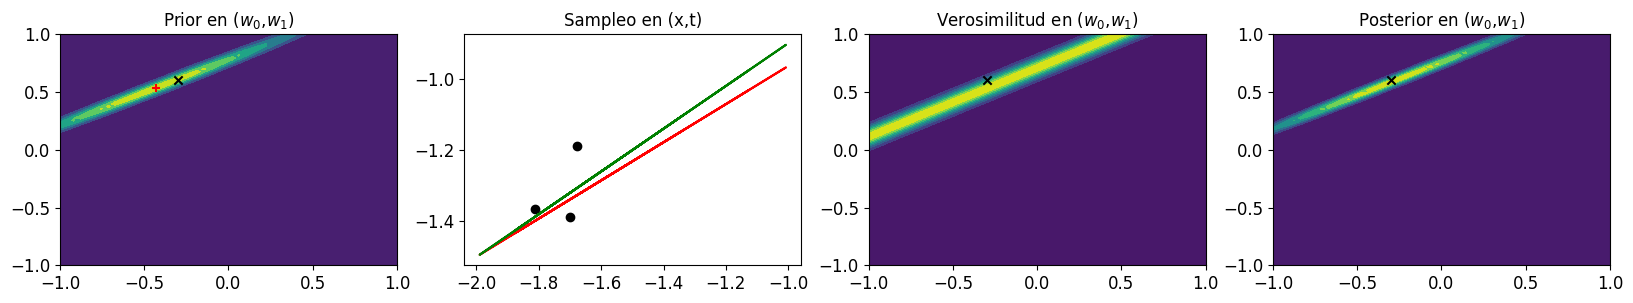

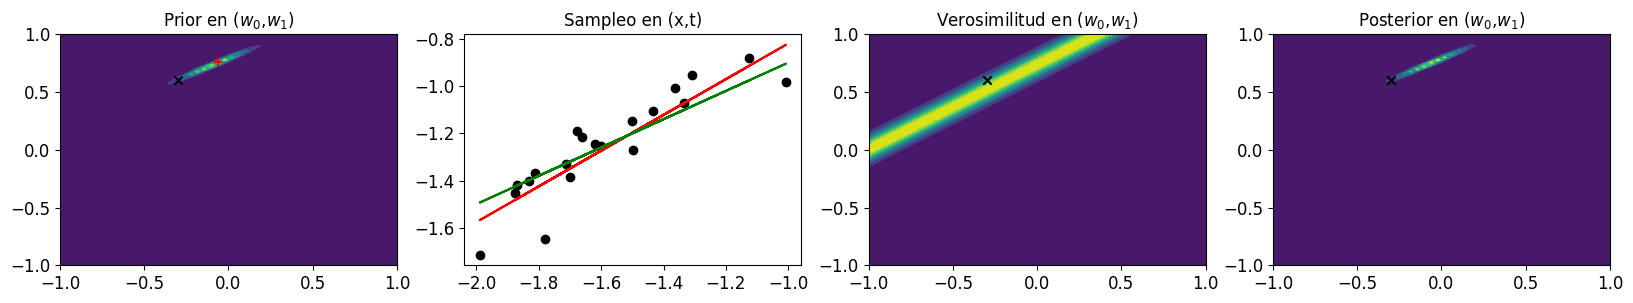

In [204]:
from scipy.stats import norm, multivariate_normal
gamma=0.5
# valores posibles
w0_values=np.linspace(-1.0,1.0,50)
w1_values=np.linspace(-1.0,1.0,100)
#para plottear
W0, W1 = np.meshgrid(w0_values,w1_values)
pos=np.dstack((W0,W1))
#definimos las listas vacias
prior=[]
verosimilitud=[]
posterior=[]

# para el dato 0:
prior.append(multivariate_normal(mean=[0.0,0.0],cov=gamma*np.eye(2)).pdf(pos))

print(prior[0].shape)

for i in range(len(x)):#loopeo sobre datos
  verosimilitud.append(norm(loc=W0+W1*x[i],scale=var).pdf(t[i]))#formula de la verosimilitud para el dato i
  evidencia = np.sum(verosimilitud[-1]*prior[-1])*(w1_values[1]-w1_values[0])*(w0_values[1]-w0_values[0])  #evidencia numerica para el dato 
  posterior.append(verosimilitud[-1]*prior[-1]/evidencia)#posterior normalizado para el dato 



# sampleo puntos de (w0,w1) maximos para prior. Utilicen np.where(a==np.max(a)) para encontrar los indices donde esta el maximo. Si hay varios maximos, quedense con el primero.

  sampleo_prior=[W0[np.where(prior[-1]==np.max(prior[-1]))][0],W1[np.where(prior[-1]==np.max(prior[-1]))][0]]

# grafico

  if(i==0 or i==1 or i==2 or i==len(x)-1):
    fig, axes = plt.subplots(1,4, figsize=(20,3))
    axes[0].contourf(W0,W1,prior[-1])
    axes[0].scatter(a0,a1,marker='x',color='black')
    axes[0].scatter(sampleo_prior[0],sampleo_prior[1],marker='+',color='red')
    axes[0].set_title('Prior en ($w_0$,$w_1$)')
    axes[1].scatter(x[:i+1],t[:i+1],color='black')
    axes[1].plot(x,sampleo_prior[0]+sampleo_prior[1]*x,color='red')
    axes[1].plot(x,a0+a1*x,color='green')
    axes[1].set_title('Sampleo en (x,t)')
    axes[2].contourf(W0,W1,verosimilitud[-1])
    axes[2].scatter(a0,a1,marker='x',color='black')
    axes[2].set_title('Verosimilitud en ($w_0$,$w_1$)')
    axes[3].contourf(W0,W1,posterior[-1])
    axes[3].scatter(a0,a1,marker='x',color='black')
    axes[3].set_title('Posterior en ($w_0$,$w_1$)')

    fig.show()

# actualizo el prior
  prior.append(posterior[-1])
  


In [205]:
W1[np.where(prior[-1]==np.max(prior[-1]))][0]

0.7777777777777779

#### Exercise:

Now include the $\beta$ using a Normal-Gamma prior.

#### Posterior predictiva

La posterior predictiva es la probabilidad de medir un nuevo valor $t'$ para un feature $x'$ dado que medimos los targets anteriores:

$$p(t'|x',X,T,\beta,\gamma)$$

Con nuestro modelado, podemos escribir esta probabilidad como:

$$p(t'|x',X,T,\gamma)=\int d\vec{w}p(t', \vec{w}|x',X,T,\beta,\gamma)$$

Utilizando las reglas de la probabilidad y el hecho de que si conozco $\vec{w}$ las mediciones son independientes, tengo:

$$p(t'|x',X,T,\gamma)=\int d\vec{w}p(t'|\vec{w},x',\beta)p(\vec{w}|X,T,\beta,\gamma)$$

¡Donde aparece nuestro posterior!

Veamos como funciona esto en la practica:

In [261]:

N_SAMPLES = 30
x = np.random.rand(N_SAMPLES, 1)
t = np.sin(2*np.pi*x) + np.random.randn(N_SAMPLES, 1) * 0.3

x_train, x_test = x[:int(0.75*N_SAMPLES)], x[int(0.75*N_SAMPLES):]
t_train, t_test = t[:int(0.75*N_SAMPLES)], t[int(0.75*N_SAMPLES):]

Obtengamos los parametros de la posterior

In [286]:
beta = 1/0.3
gamma = 1e-8 / 0.3 # gamma/beta = lambda 
mu0=0.0
M = 3

model=LinearModelDegree(degree=M)

Phi_train=model.Phi(x_train)
Phi_test=model.Phi(x_test)

$$
\boxed{\begin{array}{lll}
\vec{\mu}_N &=& \mathbf{S}_N\cdot \left(\mathbf{S}^{-1}_0 \cdot \vec{\mu}_0 + \beta\;\Phi^{T}\cdot t\right)\\
\mathbf{1} &=& \left(\mathbf{S}^{-1}_0 + \beta\;\Phi^{T}\cdot\Phi\right)\cdot \mathbf{S}_{N}\;\;.
\end{array}}
$$

In [287]:
SN=np.linalg.solve(gamma*np.eye(M+1)+beta*np.dot(Phi_train.T,Phi_train),np.eye(M+1))
muN=beta*np.dot(SN,np.dot(Phi_train.T,t_train))

In [288]:
print(np.linalg.inv(SN)/(len(x_train)*beta),np.mean(x_train),np.mean(x_train**2))## verficacion para M = 1

[[1.         0.53779803 0.36571786 0.27861833]
 [0.53779803 0.36571786 0.27861833 0.2269779 ]
 [0.36571786 0.27861833 0.2269779  0.19300353]
 [0.27861833 0.2269779  0.19300353 0.16883168]] 0.5377980264086912 0.3657178607880976


In [289]:
print(muN.shape,SN.shape)

(4, 1) (4, 4)


Teniendo la distribucion $p(\vec{w}|\vec{\mu}_{N},\mathbf{S}_{N})$, podemos ahora tratar de hacer predicciones para una nueva medicion:

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)$$

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)=\int p(t_{N+1}|x_{N+1},\vec{w},\beta)p(\vec{w}|\vec{\mu}_{N},\mathbf{S}_{N})d^{M+1}w$$

Esta integral es, a simple vista, un poco aterradora. Veamos que podemos hacer al respecto


#### Predicciones semi-bayesianas

Podemos, antes que nada, aproximar $\vec{w}$ por el valor de Maximo A Posteriori

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)\approx \mathcal{N}(t_{N+1}|y(x_{N+1},\vec{w}_{MAP}),\beta)$$

Debido a que la posterior es una Gaussiana, $\vec{w}_{MAP}=\vec{\mu}_{N}$


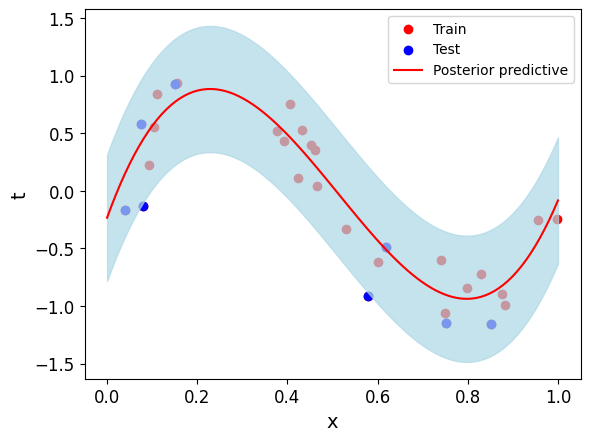

In [290]:
xx = np.linspace(0, 1, 100).reshape([-1, 1])

Phi_xx=model.Phi(xx)

tt=np.dot(Phi_xx,muN)

plt.scatter(x,t, c='red', label='Train')
plt.scatter(x_test,t_test, c='blue', label='Test')
plt.plot(xx,tt,c='red',label='Posterior predictive')
plt.fill_between(xx.flatten(), tt.flatten() + np.sqrt(1/beta), tt.flatten() - np.sqrt(1/beta), color='LightBlue', alpha=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

#### Funcion predictiva posterior

Para hacer la integral que ya mencionamos, podriamos ir directo al enfoque numerico. Para este tipo de problemas podemos recurrir a algo llamado Importance Sampling. Alli, sampleamos puntos utilizando la posterior

In [291]:
from scipy.stats import norm, multivariate_normal
Nsample=1000
w_sampled=multivariate_normal(mean=muN[:,0],cov=SN).rvs(Nsample)

Y utilizamos esos puntos sampleados para calcular

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)\approx \frac{1}{N_{\text{samples}}}\sum_{j=1}^{N_{\text{samples}}}\mathcal{N}(t_{N+1}|y(x_{N+1},\vec{w}_{j}),\beta)$$

Entonces, podemos obtener el valor promedio de $t_{N+1}$ como

$$\mathbf{E}[t_{N+1}]\approx \frac{1}{N_{\text{samples}}}\sum_{j=1}^{N_{\text{samples}}}\vec{w}_{j}^{T}\cdot \vec{\phi}(x_{N+1})=\frac{1}{N_{\text{samples}}}\sum_{j=1}^{N_{\text{samples}}}\mu_{j}$$

y la varianza viene dada por

$$\text{Var}[t_{N+1}]\approx \frac{1}{\beta}+\frac{1}{N_{\text{samples}}}(\sum_{j}\mu^{2}_{j}-\frac{1}{N_{\text{samples}}}(\sum_{l}\mu_{l})^{2})$$




In [292]:
mus=np.dot(w_sampled,Phi_xx.T)
print(mus.shape)
tt=np.mean(mus,axis=0)
print(tt.shape)

(1000, 100)
(100,)


In [293]:
sum_mu=np.sum(mus,axis=0)
sum_mu_sqr=np.sum(np.asarray([mus[:,i]*mus[:,i] for i in range(mus.shape[1])]).T,axis=0)
yerror=np.sqrt(1.0/beta+(1.0/Nsample)*(sum_mu_sqr-(1.0/Nsample)*sum_mu))

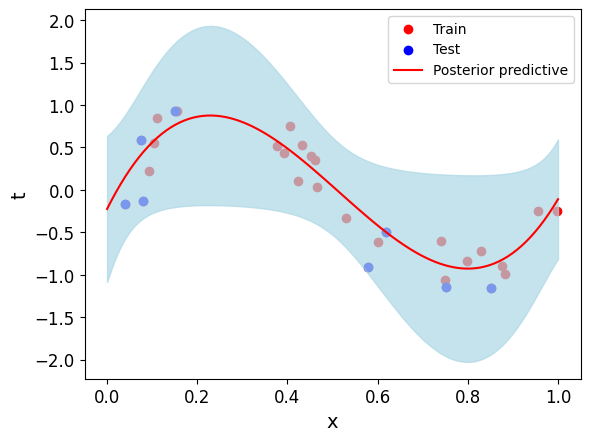

In [294]:
plt.scatter(x,t, c='red', label='Train')
plt.scatter(x_test,t_test, c='blue', label='Test')
plt.plot(xx,tt,c='red',label='Posterior predictive')
plt.fill_between(xx.flatten(), tt.flatten() + yerror.flatten(), tt.flatten() - yerror.flatten(), color='LightBlue', alpha=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Esto es util, si, pero no estamos aprovechando la belleza de usar priors conjugados. Todavia podemos resolver cosas analiticamente!

La posterior predictiva va a ser

$$
p(t_{N+1} | x_{N+1}, t_{1,...,N}, x_{1,...,N}, \gamma, \beta) = \mathcal{N}(t_{N+1} | \vec{\mu}_N^{T} \vec{\phi}(x_{N+1}), \sigma_N^2)\;\;,
$$

donde la varianza es
$$
\sigma_N^2 = \frac{1}{\beta} + \vec{\phi}(x_{N+1})^{T} \mathbf{S}_N \vec{\phi}(x_{N+1})\;\;,
$$
que consiste en una contribución debida a la incertidumbre en los parámetros, y otra que viene de la incerteza de los datos.

In [295]:
mupred=np.dot(muN.T,Phi_xx.T).T
aux=np.asarray(list(map(lambda i: np.dot(Phi_xx[i,:],np.dot(SN,Phi_xx[i,:])),range(Phi_xx.shape[0]))))
sigmapred=np.sqrt(1.0/beta+aux)

In [296]:
sigmapred.shape

(100,)

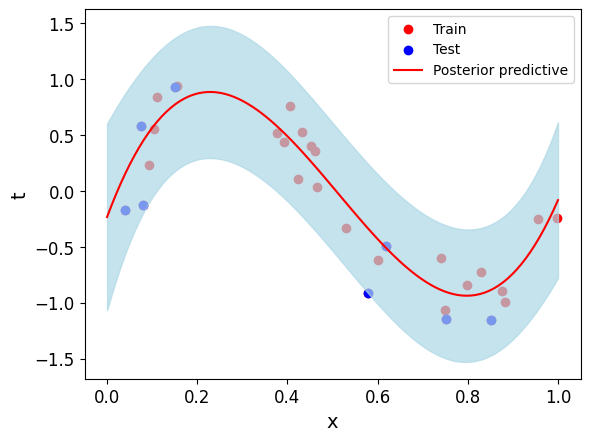

In [297]:


plt.scatter(x,t, c='red', label='Train')
plt.scatter(x_test,t_test, c='blue', label='Test')
plt.plot(xx,mupred,c='red',label='Posterior predictive')
plt.fill_between(xx.flatten(), mupred.flatten() + sigmapred.flatten(), mupred.flatten() - sigmapred.flatten(), color='LightBlue', alpha=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

#### Ejercicio

Repitamos todo esto eligiendo unicamente 2 puntos al azar para entrenar el modelo. Que pasa?